# Machine Learning p2


### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### Standardizing the data (scaling down the data)
#### 2. The elbow technique
#### 3. k-means clustering

## 1. Import Libraries and Data

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib
from sklearn.preprocessing import StandardScaler 

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
# Path to the original data
path= r'/Users/mentaykoshzhanova/Desktop/boat project'

In [5]:
# Using path join
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_vis_explore.csv'), index_col = False)

In [6]:
df.shape

(9888, 13)

In [7]:
df.head()

,Unnamed: 0,Boat Type,Manufacturer,Condition,Year Built,Length,Width,Material,Number of views last 7 days,Price_in_usd,Country,Price_category,Boat Age
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,226,3704.07,Switzerland,Low price,New boat
1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3734.30,Germany,Low price,New boat
2,2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,4184.70,Switzerland,Low price,NaN
3,3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,64,3626.00,Denmark,Low price,New boat
4,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3636.93,Germany,Low price,New boat


In [41]:
# creating columns for numerical columns only
columns2 = ['Year Built', 'Price_in_usd', 'Length', 'Width', 'Number of views last 7 days']
columns3 = ['Year Built', 'Price_in_usd']

In [42]:
# creating a subset for new columns var
sub = df[columns2]
sub2 = df[columns3]

In [10]:
sub.head()

,Year Built,Price_in_usd,Length,Width,Number of views last 7 days
0,2017,3704.07,4.00,1.90,226
1,2020,3734.30,4.00,1.50,75
2,0,4184.70,3.69,1.42,124
3,2020,3626.00,3.00,1.00,64
4,2019,3636.93,3.55,1.46,58


In [43]:
sub2.head()

,Year Built,Price_in_usd
0,2017,3704.07
1,2020,3734.30
2,0,4184.70
3,2020,3626.00
4,2019,3636.93


In [11]:
# Check for missing values
sub.isnull().sum()

Year Built                       0
Price_in_usd                   298
Length                           9
Width                           56
Number of views last 7 days      0
dtype: int64

In [12]:
# Impute missing values with median for price column
sub['Price_in_usd'].fillna(sub['Price_in_usd'].median(), inplace=True)
sub['Length'].fillna(sub['Length'].median(), inplace=True)
sub['Width'].fillna(sub['Width'].median(), inplace=True)

/var/folders/yz/w55xm0757_xf7s97jpfxx22h0000gn/T/ipykernel_57346/3754212161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['Price_in_usd'].fillna(sub['Price_in_usd'].median(), inplace=True)
/var/folders/yz/w55xm0757_xf7s97jpfxx22h0000gn/T/ipykernel_57346/3754212161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['Length'].fillna(sub['Length'].median(), inplace=True)
/var/folders/yz/w55xm0757_xf7s97jpfxx22h0000gn/T/ipykernel_57346/3754212161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [13]:
# Check for missing values
sub.isnull().sum()

Year Built                     0
Price_in_usd                   0
Length                         0
Width                          0
Number of views last 7 days    0
dtype: int64

### Standardizing the data (scaling down the data)

In [14]:
# define standard scaler 
scaler = StandardScaler() 

In [15]:
# transform data with scaler
stand_df = scaler.fit_transform(sub)
stand_df

array([[ 0.26904167, -0.29784429, -1.26149286, -1.3302556 ,  0.50614682],
       [ 0.27556088, -0.2978138 , -1.26149286, -1.65890704, -0.48850397],
       [-4.11404192, -0.29735961, -1.3131603 , -1.72463733, -0.16573649],
       ...,
       [ 0.27556088, -0.29672508, -1.19482518, -1.41241846,  1.34929451],
       [ 0.27121474, -0.2969398 , -1.19982526, -1.33847188,  0.76963047],
       [ 0.27338781, -0.29734842, -1.32816053, -1.57674418,  0.2953599 ]])

In [16]:
# converting the standardized data to df
sub = pd.DataFrame(stand_df, columns=sub.columns)
sub

,Year Built,Price_in_usd,Length,Width,Number of views last 7 days
0,0.269042,-0.297844,-1.261493,-1.330256,0.506147
1,0.275561,-0.297814,-1.261493,-1.658907,-0.488504
2,-4.114042,-0.297360,-1.313160,-1.724637,-0.165736
3,0.275561,-0.297923,-1.428162,-2.069721,-0.560962
4,0.273388,-0.297912,-1.336494,-1.691772,-0.600485
...,...,...,...,...,...
9883,0.203850,-0.296095,-0.878154,-0.886576,6.368658
9884,-4.114042,-0.296707,-1.233159,-1.511014,-0.363349
9885,0.275561,-0.296725,-1.194825,-1.412418,1.349295
9886,0.271215,-0.296940,-1.199825,-1.338472,0.769630


## 2. The elbow technique

In [17]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/mentaykoshzhanova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mentaykoshzhanova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mentaykoshzhanova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mentaykoshzhanova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

[-49439.99999999995,
 -36882.91568690724,
 -27409.761267931462,
 -20792.006515779696,
 -16145.397308619189,
 -12813.70248710587,
 -11125.923683050452,
 -9594.598840057042,
 -8754.122845596463]

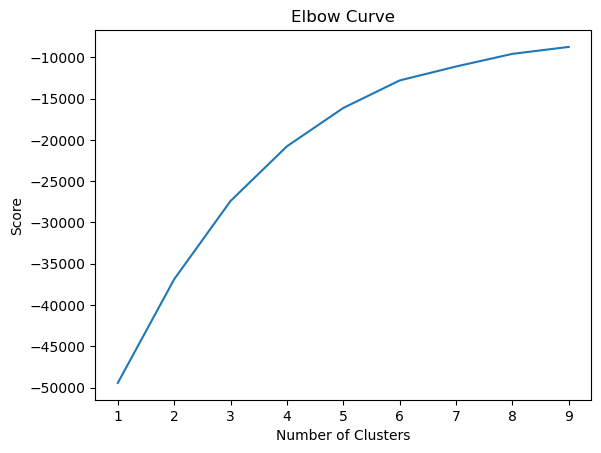

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### There's a slight jump from two to three then to four on the x-axis, but after that it rises slightly. The optimal count for clusters might be 3.

## 3. k-means clustering

In [20]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [21]:
# Fit the k-means object to the data.
kmeans.fit(sub)

/Users/mentaykoshzhanova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [22]:
sub['clusters'] = kmeans.fit_predict(sub)

/Users/mentaykoshzhanova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
sub.head()

,Year Built,Price_in_usd,Length,Width,Number of views last 7 days,clusters
0,0.269042,-0.297844,-1.261493,-1.330256,0.506147,0
1,0.275561,-0.297814,-1.261493,-1.658907,-0.488504,0
2,-4.114042,-0.297360,-1.313160,-1.724637,-0.165736,2
3,0.275561,-0.297923,-1.428162,-2.069721,-0.560962,0
4,0.273388,-0.297912,-1.336494,-1.691772,-0.600485,0


In [24]:
sub['clusters'].value_counts()

clusters
0    6475
1    2868
2     545
Name: count, dtype: int64

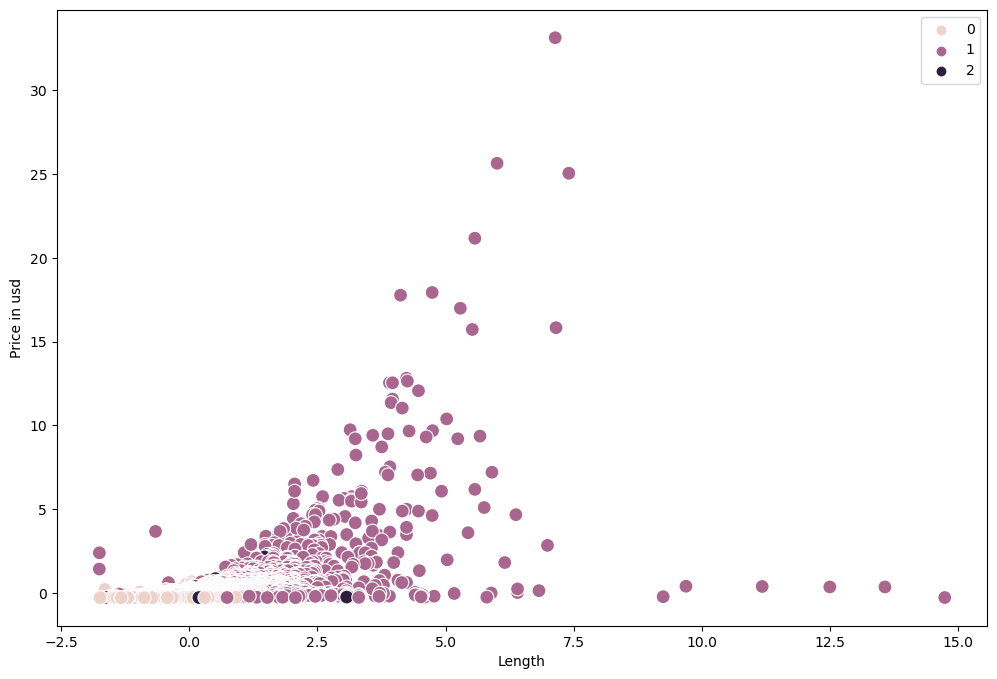

In [25]:
# Plot the clusters for the 'Price in usd' and 'Length' variables.

plt.figure(figsize=(12,8))
sc1 = sns.scatterplot(x=sub['Length'], y=sub['Price_in_usd'], hue=kmeans.labels_, s=100) 

sc1.grid(False) # This removes the grid from the background.
plt.xlabel('Length') # Label x-axis.
plt.ylabel('Price in usd') # Label y-axis.
plt.show()

In [26]:
sc1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sc1price_vs_length.png'))

#### Cluster 1 (pink) is the more populated cluster that shows that shorter boats cost less expensive than long ones. 

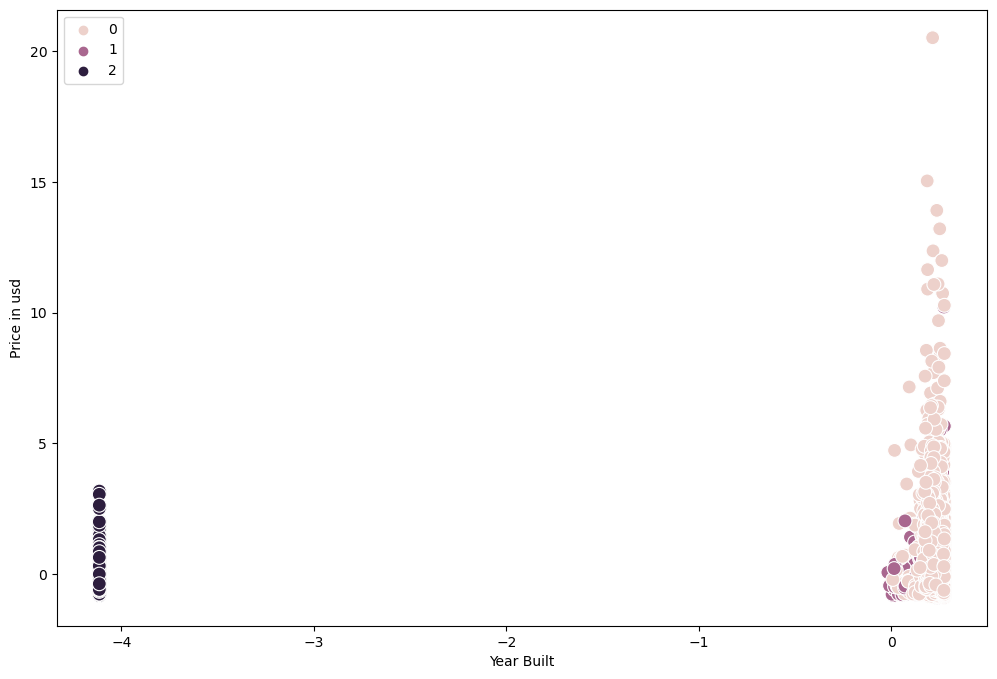

In [27]:
# Plot the clusters for the 'Number of views' and 'Price in usd' variables.

plt.figure(figsize=(12,8))
sc2 = sns.scatterplot(x=sub['Year Built'], y=sub['Number of views last 7 days'], hue=kmeans.labels_, s=100)

sc2.grid(False) 
plt.xlabel('Year Built') 
plt.ylabel('Price in usd') 
plt.show()

#### This scatter does not make sense to me. This analysis probably is not the best suitable when it comes to date showing

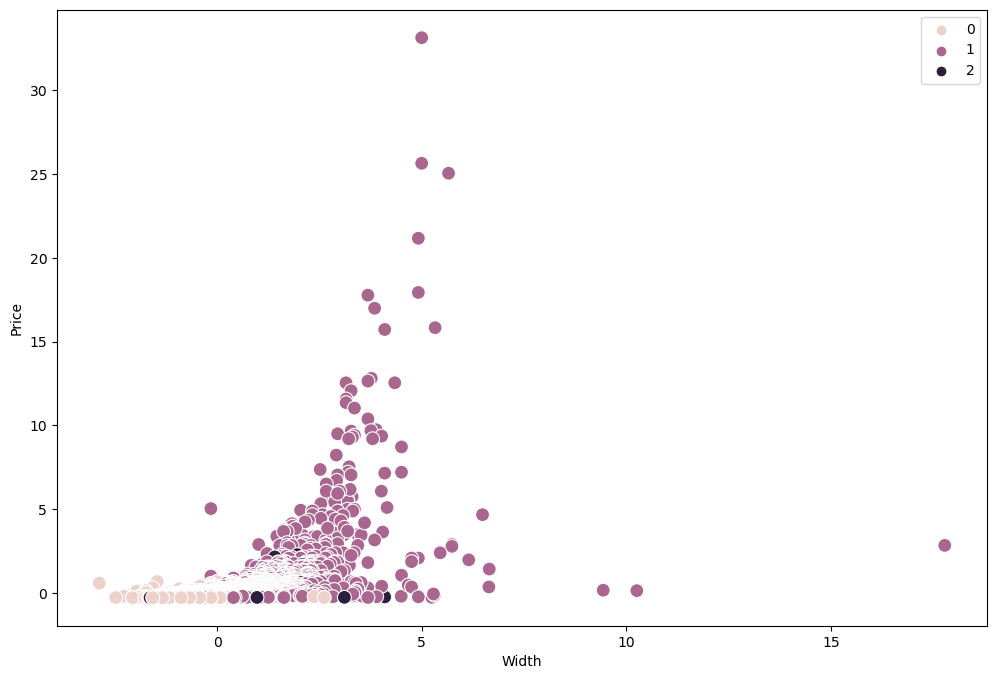

In [28]:
# Plot the clusters for the 'Price in usd' and 'Width' variables.

plt.figure(figsize=(12,8))
sc3 = sns.scatterplot(x=sub['Width'], y=sub['Price_in_usd'], hue=kmeans.labels_, s=100) 

sc3.grid(False) # This removes the grid from the background.
plt.xlabel('Width') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### This scatter plot is close to one where price vs length was shown. The width can be one of the factors of pricing the boat, but not the only factor. 

In [29]:
sc3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sc3price_vs_width.png'))

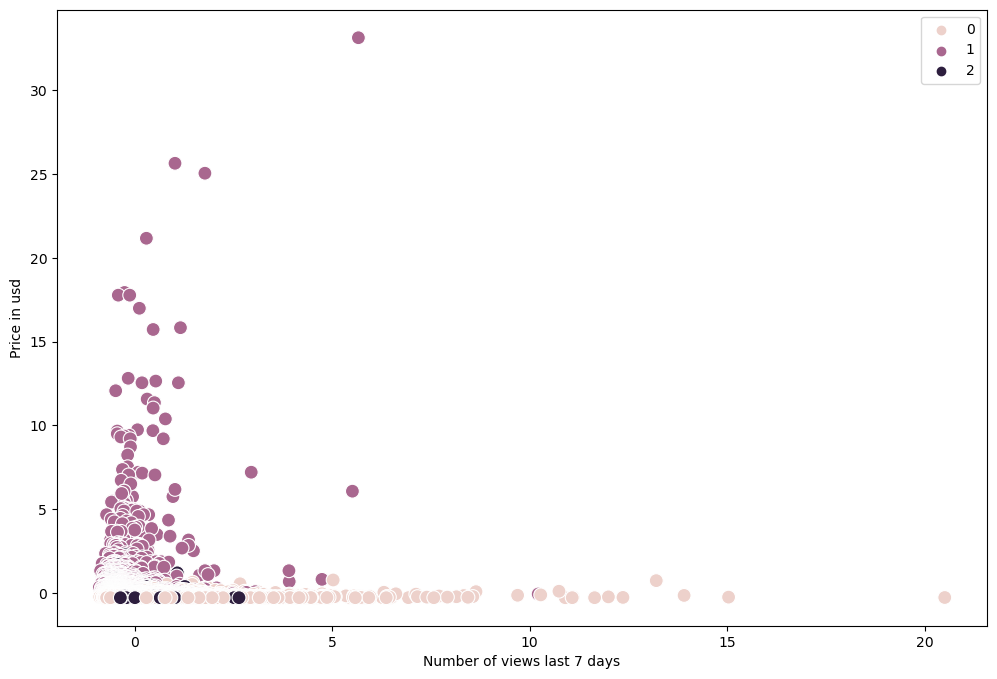

In [30]:
# Plot the clusters for the 'Price in usd' and 'Year Built' variables.

plt.figure(figsize=(12,8))
sc4 = sns.scatterplot(x=sub['Number of views last 7 days'], y=sub['Price_in_usd'], hue=kmeans.labels_, s=100) 

sc4.grid(False) # This removes the grid from the background.
plt.xlabel('Number of views last 7 days') # Label x-axis.
plt.ylabel('Price in usd') # Label y-axis.
plt.show()

#### The pink cluster (number 1 in the legend) that lower priced boats get the most views vs higher priced boats. Which proves one on hypothesis wrong.

In [31]:
sc4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sc4views_vs_price.png'))

In [32]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

In [33]:
sub.groupby('cluster').agg({'Number of views last 7 days':['mean', 'median'], 
                         'Length':['mean', 'median'], 
                         'Width':['mean', 'median'],
                          'Price_in_usd':['mean', 'median']})

Number of views last 7 days              Length            \
                                   mean    median      mean    median   
cluster                                                                 
dark purple                   -0.119699 -0.290891 -0.562073 -0.728151   
pink                           0.148312 -0.172324 -0.457085 -0.478148   
purple                        -0.312093 -0.429220  1.138757  0.805205   

                Width           Price_in_usd            
                 mean    median         mean    median  
cluster                                                 
dark purple -0.584925 -0.804413    -0.147549 -0.243421  
pink        -0.472130 -0.508627    -0.206729 -0.234542  
purple       1.177067  0.929223     0.494764  0.070681

### The pink cluster (1 in the legend) contains some extreme points and is the dominating clusters in 3 of shown scatterplots. 

### The 'Year built' and 'value in eur' variables do not completely make sense or provide much insight into the link between boat cost and the year built. 

### In conclusion, we can see that there is some relationship between the length and width of the boat and the price of the boat, and the views. These relationships need to be explored more. 

In [55]:
get_dataset_names(df)
#plot = sns.load_dataset ('df')
#sns.swarmplot(x='Year Built', y='Price_in_usd', data = plot(1000))

NameError: name 'get_dataset_names' is not defined

In [41]:
#Exporting to csv
sub.to_csv(os.path.join(path, '02 Data','Prepared Data', 'sub_scatterplot.csv'))